In [1]:
file_path=r'data\cleaned\clean_dataset.csv'
##%pip install matplotlib seaborn plotly
#%pip install nbformat>=4.2.0
#%pip install dash
#%pip install scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from dash import Dash, dcc, html, Output, Input
import plotly.figure_factory as ff
df=pd.read_csv(file_path)

In [3]:
df['price_per_m2']=df['price']/df['area']
df["log_price_m2"] = np.log(df["price_per_m2"].replace(0, np.nan))

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = df[df["area"] >= 15] #cleaning the unrealistic surfaces - there were some with surface set as 1m2. Setting to 15 as it's within the average minimum surface area 
df= df[df["price"] >=80_000] # cleaning unrealistic prices
df_cluster = df[["area", "rooms", "price"]].dropna()
#df_cluster = df[[ "area", "price"]].dropna()
# scale variables (important!)
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# cluster into 2 groups
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(X)

In [5]:
df_cluster.groupby("cluster").median()

,area,rooms,price
cluster,,,
0,120.0,3.0,289000.0
1,337.0,5.0,785000.0


In [6]:
df = df.merge(df_cluster["cluster"], left_index=True, right_index=True, how="left")
df.head(10)

,property_id,url,property_type,price,rooms,area,state,facades_number,is_furnished,has_terrace,...,has_equipped_kitchen,has_swimming_pool,has_open_fire,property_subtype,postal_code,locality,sale_type,price_per_m2,log_price_m2,cluster
0,RBU61383,https://immovlan.be/en/detail/residence/for-sa...,House,299000.0,3.0,176.0,Normal,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2660.0,hoboken,standard,1698.863636,7.437715,0.0
1,RBU61403,https://immovlan.be/en/detail/residence/for-sa...,House,439000.0,4.0,189.0,Normal,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2170.0,merksem,standard,2322.751323,7.750508,0.0
2,RBU61404,https://immovlan.be/en/detail/residence/for-sa...,House,264000.0,2.0,107.0,To be renovated,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2610.0,wilrijk,standard,2467.289720,7.810876,0.0
3,RBU43493,https://immovlan.be/en/detail/residence/for-sa...,House,329000.0,4.0,139.0,To be renovated,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2100.0,deurne,standard,2366.906475,7.769339,0.0
4,RBU50579,https://immovlan.be/en/detail/residence/for-sa...,House,340000.0,2.0,187.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2140.0,borgerhout,standard,1818.181818,7.505592,0.0
5,RBU61492,https://immovlan.be/en/detail/residence/for-sa...,House,499000.0,4.0,246.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,residence,2660.0,hoboken,standard,2028.455285,7.615030,0.0
6,RBU50511,https://immovlan.be/en/detail/residence/for-sa...,House,329000.0,3.0,116.0,Normal,NaN,NaN,NaN,...,NaN,NaN,NaN,residence,2610.0,wilrijk,standard,2836.206897,7.950223,0.0
7,RBU50595,https://immovlan.be/en/detail/residence/for-sa...,House,665000.0,4.0,190.0,Normal,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2600.0,berchem,standard,3500.000000,8.160518,0.0
8,RBU31064,https://immovlan.be/en/detail/residence/for-sa...,House,399000.0,4.0,166.0,Normal,NaN,0.0,NaN,...,NaN,NaN,NaN,residence,2180.0,ekeren,standard,2403.614458,7.784729,0.0
9,RBU23697,https://immovlan.be/en/detail/residence/for-sa...,House,364000.0,3.0,165.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,residence,2660.0,hoboken,standard,2206.060606,7.698964,0.0


In [7]:
c0 = df[df.cluster == 0]["area"].median()
c1 = df[df.cluster == 1]["area"].median()

df["is_luxurious"] = (df["cluster"] == (0 if c0 > c1 else 1))

In [8]:
print("=== Normal properties ===")
for url in df[df["cluster"] == 0]["url"].sample(5, random_state=42):
    print(url)


=== Normal properties ===
https://immovlan.be/en/detail/residence/for-sale/6060/gilly/vbd36165
https://immovlan.be/en/detail/apartment/for-sale/2500/lier/rbu27115
https://immovlan.be/en/detail/residence/for-sale/9000/gent/rbt83595
https://immovlan.be/en/detail/apartment/for-sale/8800/roeselare/rbu27450
https://immovlan.be/en/detail/residence/for-sale/1300/wavre/vbd26845


In [9]:
print("\n=== Luxury properties ===")
for url in df[df["cluster"] == 1]["url"].sample(5, random_state=42):
    print(url)



=== Luxury properties ===
https://immovlan.be/en/detail/apartment/for-sale/8301/duinbergen/rbu52281
https://immovlan.be/en/detail/cottage/for-sale/1600/sint-pieters-leeuw/rbs84560
https://immovlan.be/en/detail/residence/for-sale/1120/neder-over-heembeek/vbd41663
https://immovlan.be/en/detail/residence/for-sale/7520/ramegnies-chin/vba98738
https://immovlan.be/en/detail/residence/for-sale/9041/oostakker/rbu48401


In [10]:
df["cluster"].value_counts(normalize=True)*100


cluster
0.0    90.812797
1.0     9.187203
Name: proportion, dtype: float64

In [11]:
df.groupby("cluster")[["area","rooms","price","price_per_m2"]].median()


,area,rooms,price,price_per_m2
cluster,,,,
0.0,120.0,3.0,289000.0,2480.768093
1.0,337.0,5.0,785000.0,2311.253561


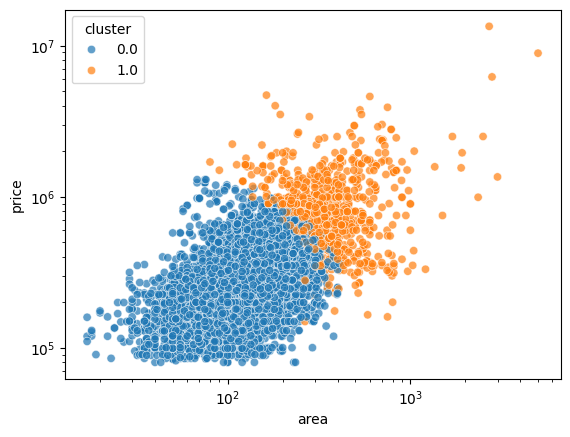

In [12]:
import seaborn as sns
sns.scatterplot(data=df, x="area", y="price", hue="cluster", alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.show()


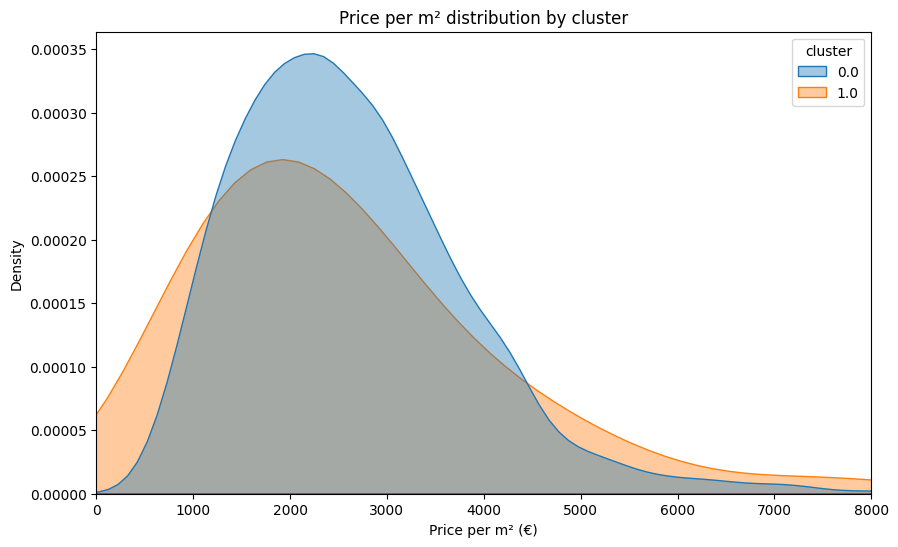

In [13]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="price_per_m2", hue="cluster", fill=True, common_norm=False, alpha=0.4)
plt.xlim(0, 8000)  # adjust as needed
plt.title("Price per m² distribution by cluster")
plt.xlabel("Price per m² (€)")
plt.show()

In [14]:
def count_outliers_per_cluster(df, cluster_col="cluster"):
    results = {}

    num_cols = df.select_dtypes(include="number").columns

    for col in num_cols:
        x_all = df[col].dropna()

        # IQR thresholds for the full dataset
        q1 = x_all.quantile(0.25)
        q3 = x_all.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # Full dataset outliers
        out_all = ((x_all < lower) | (x_all > upper)).sum()
        pct_all = out_all / len(x_all) * 100

        # Cluster 0
        x0 = df[df[cluster_col] == 0][col].dropna()
        out0 = ((x0 < lower) | (x0 > upper)).sum()
        pct0 = out0 / len(x0) * 100 if len(x0) > 0 else 0

        # Cluster 1
        x1 = df[df[cluster_col] == 1][col].dropna()
        out1 = ((x1 < lower) | (x1 > upper)).sum()
        pct1 = out1 / len(x1) * 100 if len(x1) > 0 else 0

        results[col] = {
            "outliers_all": out_all,
            "pct_all": pct_all,
            "outliers_cluster0": out0,
            "pct_cluster0": pct0,
            "outliers_cluster1": out1,
            "pct_cluster1": pct1,
        }

    return pd.DataFrame(results).T.sort_values("pct_all", ascending=False)


In [15]:
outlier_stats_clusters = count_outliers_per_cluster(df)
outlier_stats_clusters


,outliers_all,pct_all,outliers_cluster0,pct_cluster0,outliers_cluster1,pct_cluster1
has_swimming_pool,102.0,14.468085,33.0,6.099815,69.0,43.396226
cluster,850.0,9.187203,0.0,0.000000,850.0,100.000000
rooms,819.0,8.852140,382.0,4.546537,437.0,51.411765
price,620.0,6.562235,138.0,1.642466,478.0,56.235294
area,573.0,6.064776,57.0,0.678410,499.0,58.705882
is_furnished,219.0,4.324645,167.0,3.680035,28.0,6.236080
price_per_m2,298.0,3.154107,213.0,2.535111,66.0,7.764706
has_equipped_kitchen,27.0,2.168675,24.0,2.323330,2.0,0.961538
log_price_m2,197.0,2.085097,114.0,1.356820,79.0,9.294118
facades_number,0.0,0.000000,0.0,0.000000,0.0,0.000000
